# Marvel Cinematic Universe Machine Learning

Import dependencies

In [9]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
data = pd.read_csv('machine_learning_marvel.csv')
data.head()

,title,year,CA,IM,BW,Thor,Hulk,HE,NF,Vision,...,PR,tomato_meter,tom_aud_score,entity,universe_code,id,star_1,star_2,star_3,star_4
0,Iron Man,2008,0,1,0,0,0,0,1,1,...,0,94,91,MARVEL,1000,19,Jon Favreau,Robert Downey Jr.,Gwyneth Paltrow,Terrence Howard
1,Iron Man 2,2010,0,1,1,0,0,0,1,1,...,0,72,71,MARVEL,1000,23,Jon Favreau,Robert Downey Jr.,Mickey Rourke,Gwyneth Paltrow
2,Captain America: The First Avenger,2011,1,0,0,0,0,0,1,0,...,0,80,74,MARVEL,1000,26,Joe Johnston,Chris Evans,Hugo Weaving,Samuel L. Jackson
3,Thor,2011,0,0,0,1,0,1,1,0,...,0,77,76,MARVEL,1000,24,Kenneth Branagh,Chris Hemsworth,Anthony Hopkins,Natalie Portman
4,The Avengers,2012,1,1,1,1,1,1,1,1,...,0,91,91,MARVEL,1000,28,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson


In [12]:
X = data[["CA", "IM", "BW", "Thor", "Hulk", "HE", "NF", "Vision", "SM", "SL", "Wanda", "AM", "DS", "BP", "CM", "JF", "AR", "JossW", "JG", "JW", "PR"]]
y = data["imdb_gross"].values.reshape(-1, 1)
print(X.shape, y.shape)

(22, 21) (22, 1)


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,CA,IM,BW,Thor,Hulk,HE,NF,Vision,SM,SL,...,AM,DS,BP,CM,JF,AR,JossW,JG,JW,PR
20,1,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11,1,1,1,0,0,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,0
3,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
17,1,1,1,1,1,0,1,1,1,1,...,0,1,1,0,0,1,0,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

KeyError: 'size'

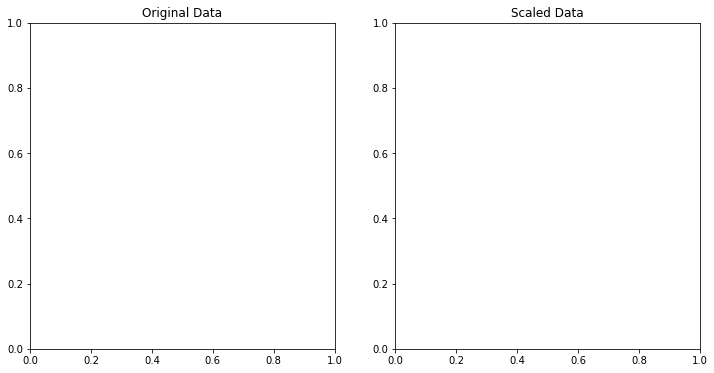

In [17]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["size"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])